## Introduction

The purpose of this notebook is to serve as a simple run of functional linear regression (FLR) on the Tecator data set. In particular, we use B-spline basis function expansions for both the functional inputs and the coefficient function, along with a roughness penalty. There will be a few main parts to this analysis:

1. Functional linear regression on the entire 215-sample data set for visualization purposes.
2. Functional linear regression using two nested grid searches: one to determine the optimal smoothing parameters and one to evaluate fold-wise $R^{2}$.

We offload most of the computation to `scripts/03_flr.py` and `src/fda_models.py` and only pull in plots and results in this notebook.

## Imports

In [1]:
from IPython.display import Image
import os
from pathlib import Path
import pickle

## Run the script `scripts/03_flr.py`

This script runs some FLR models and saves results for a quick analysis. Expect this script to run for a few minutes.

In [2]:
%run ../scripts/03_flr.py

## TODO: pull full analysis from test notebook

## Evaluate repeated CV $R^{2}$

We now repeat a similar experiment as in the end of the notebooks `01_ols.ipynb` and `02_ridge.ipynb`. We run 10-fold CV ridge regression 10 times to get 100 different generalization $R^{2}$ estimates. This means for each of the 100 estimates, we have CV train and test sets. We take each train set and perform a leave-one-out cross-validation (LOOCV) to choose the best penalty parameter $\lambda$, then evaluate the regression with this $\lambda$ on the test set. We report the mean, standard deviation, and boxplot of the 100 resulting $R^{2}$ values. Note that this procedure to choose the best hyperparameter for each training set differs from the 10-fold CV used in the previous analyses. We choose LOOCV for numerical advantages.

OLS CV R^2 mean: 0.9308
OLS CV R^2 standard deviation: 0.0773

Ridge CV R^2 mean: 0.9547
Ridge CV R^2 standard deviation: 0.0431

FLR CV R^2 mean: 0.9574
FLR CV R^2 standard deviation: 0.0222


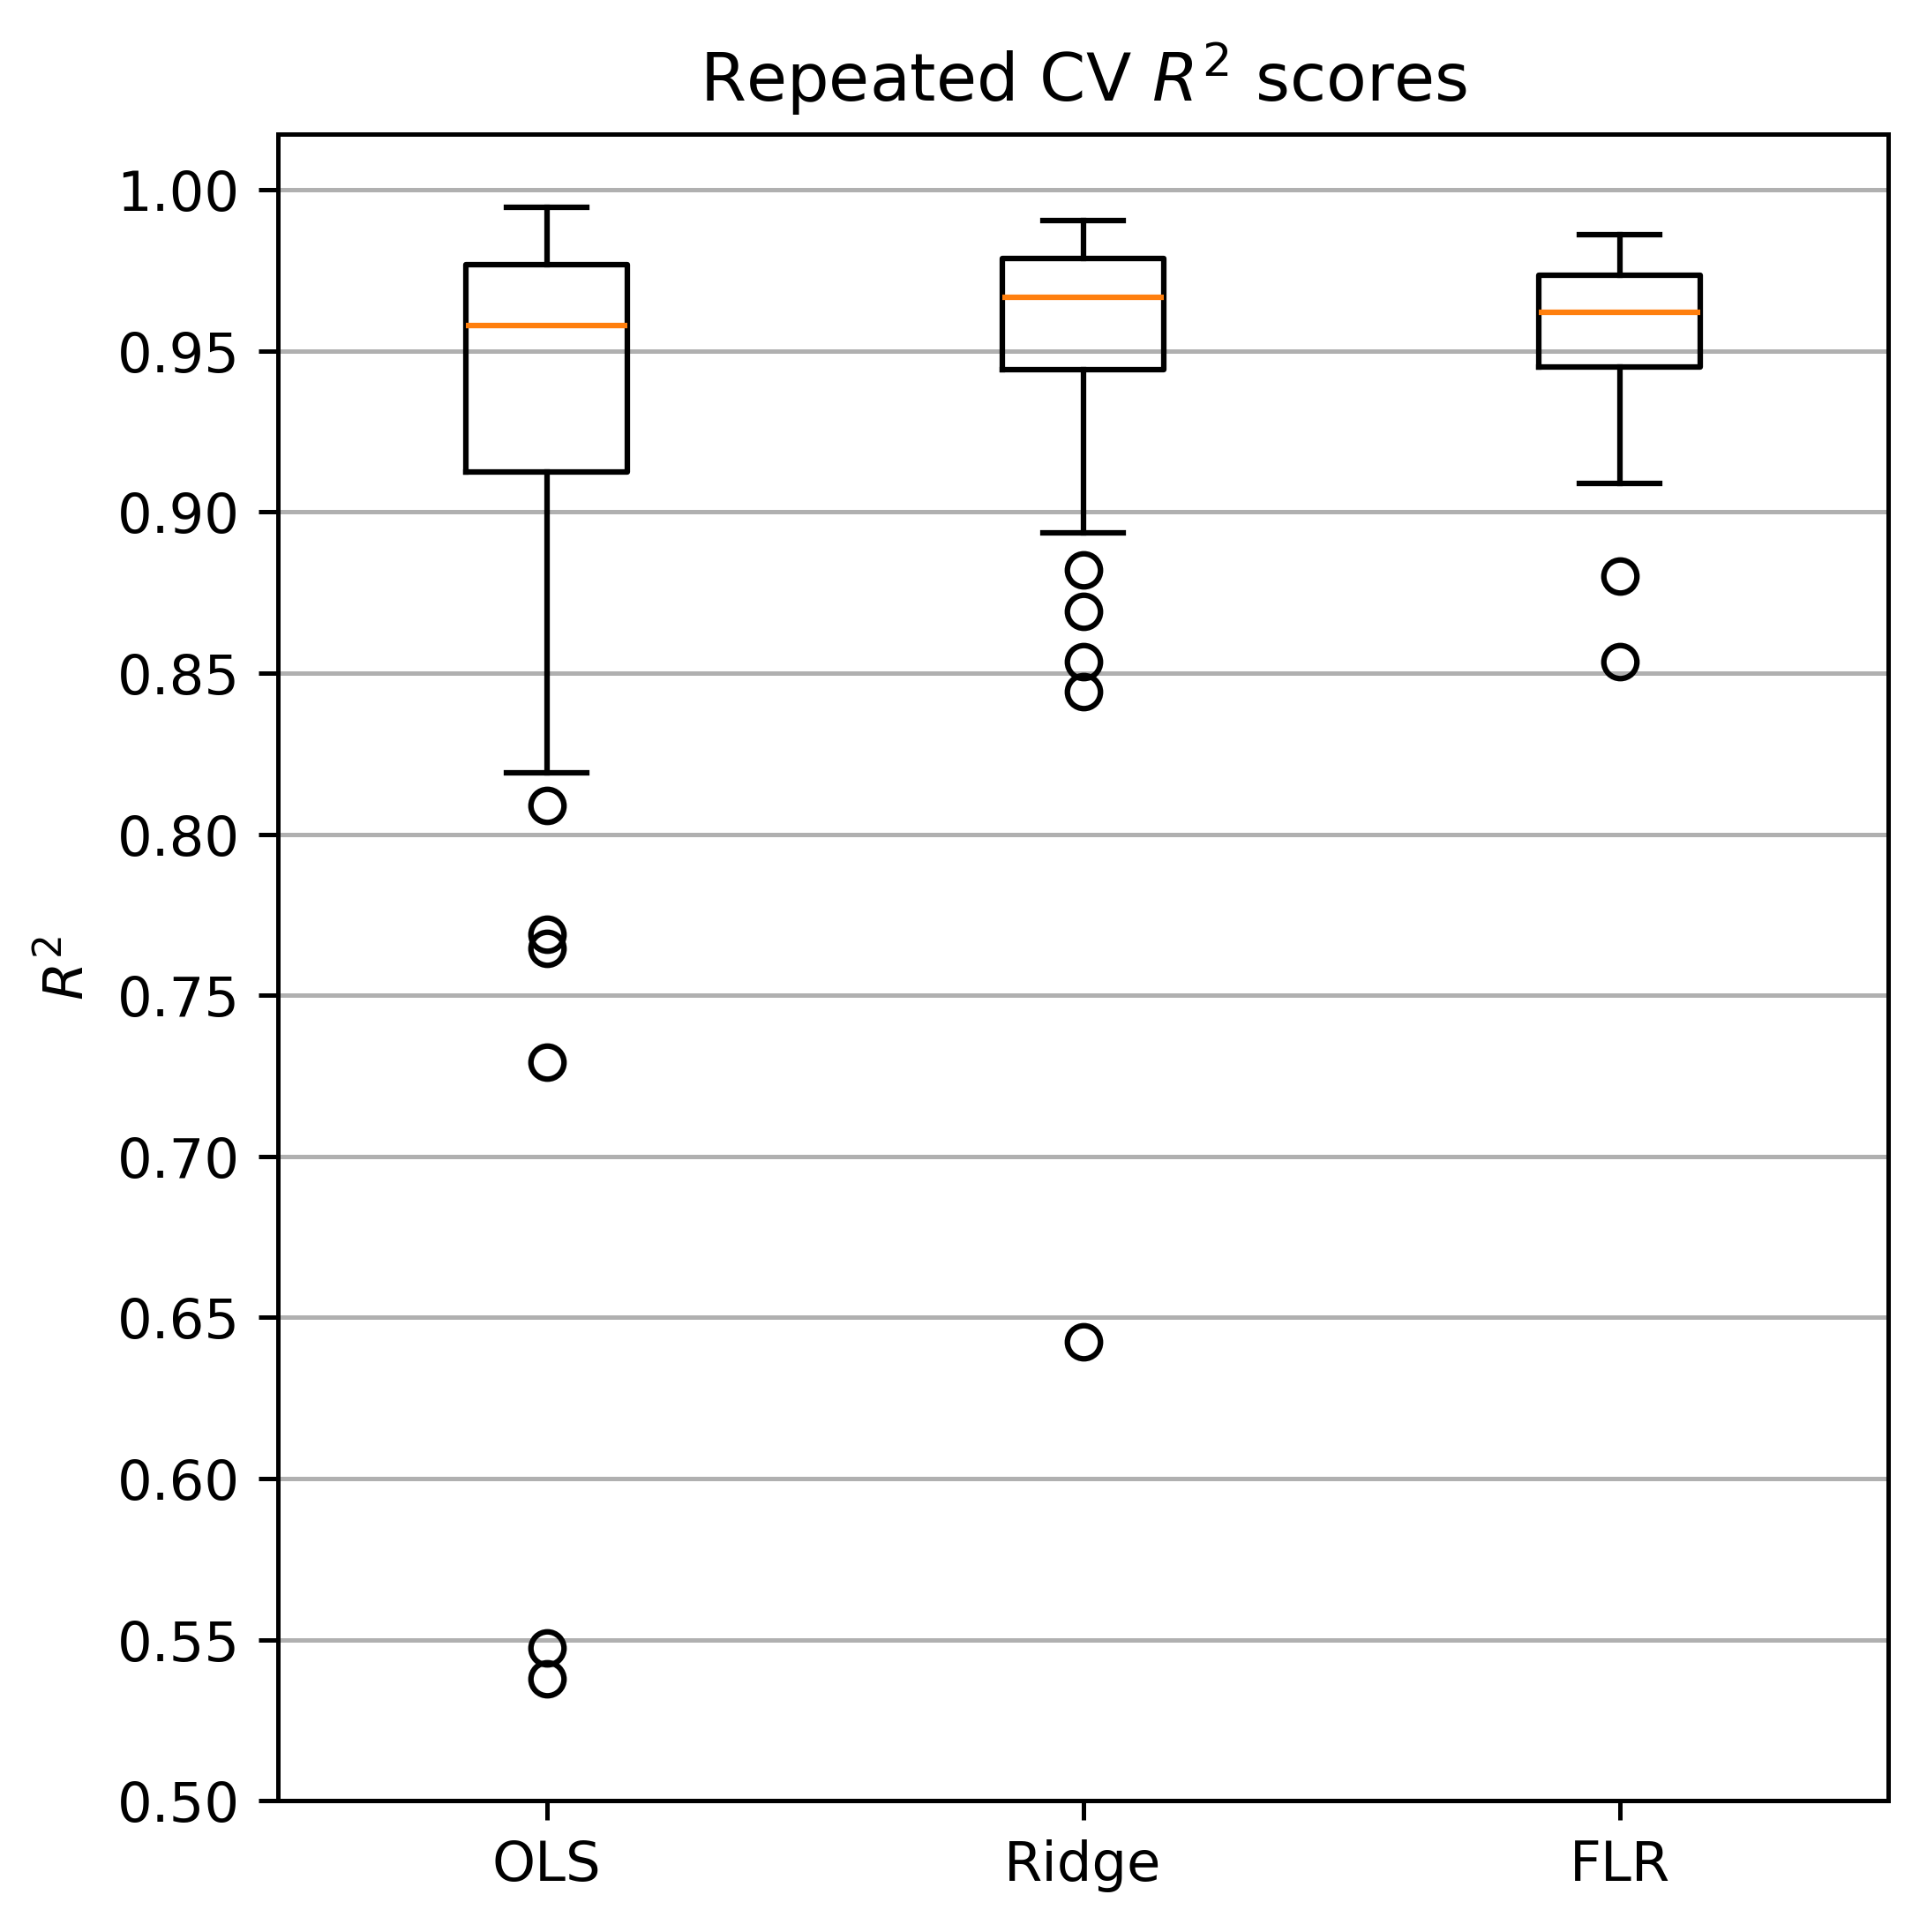

In [3]:
# Load the R^2 scores for OLS, Ridge, and FLR.
with open(str((Path(os.getcwd()).parent / "data" / "01_ols" / "results" / "ols_cv.pkl")), "rb") as f: # We're currently in <repo>/notebooks/01_ols.ipynb, but we need to be in <repo>/data/01_ols.
    ols_cv_scores = pickle.load(f).r2_scores

with open(str((Path(os.getcwd()).parent / "data" / "02_ridge" / "repeated_cv_results" / "results.pkl")), "rb") as f: # We're currently in <repo>/notebooks/01_ols.ipynb, but we need to be in <repo>/data/01_ols.
    ridge_cv_scores = pickle.load(f)

with open(str((Path(os.getcwd()).parent / "data" / "03_flr" / "repeated_cv_results" / "results.pkl")), "rb") as f: # We're currently in <repo>/notebooks/01_ols.ipynb, but we need to be in <repo>/data/01_ols.
    flr_cv_scores = pickle.load(f)

print("OLS CV R^2 mean:", round(ols_cv_scores.mean(), 4))
print("OLS CV R^2 standard deviation:", round(ols_cv_scores.std(), 4))
print()
print("Ridge CV R^2 mean:", round(ridge_cv_scores.mean(), 4))
print("Ridge CV R^2 standard deviation:", round(ridge_cv_scores.std(), 4))
print()
print("FLR CV R^2 mean:", round(flr_cv_scores["r2_scores"].mean(), 4))
print("FLR CV R^2 standard deviation:", round(flr_cv_scores["r2_scores"].std(), 4))

Image(filename="../data/03_flr/plots/comparison.png", width=400)

Ridge and FLR are very similar! Just from this chart, there's not enough evidence to say that one generalizes to test sets better than the other.